# 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
path = r"C:\Users\edriesberg\Google Drive\Instacart Basket Analysis"

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust.pkl'))

In [4]:
ords_prods_cust.head(10)

order_id user_id  user_order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1                  1                   2                  8   
1   2398795       1                  2                   3                  7   
2    473747       1                  3                   3                 12   
3   2254736       1                  4                   4                  7   
4    431534       1                  5                   4                 15   
5   3367565       1                  6                   2                  7   
6    550135       1                  7                   1                  9   
7   3108588       1                  8                   1                 14   
8   2295261       1                  9                   1                 16   
9   2550362       1                 10                   4                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   
5                    19.0         196                  1          1   
6                    20.0         196                  1          1   
7                    14.0         196                  2          1   
8                     0.0         196                  4          1   
9                    30.0         196                  1          1   

  product_name  ...  first_name  last_name  gender    state age date_joined  \
0         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
1         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
2         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
3         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
4         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
5         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
6         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
7         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
8         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
9         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   

  n_dependants  fam_status income  _merge  
0            3     married  40423    both  
1            3     married  40423    both  
2            3     married  40423    both  
3            3     married  40423    both  
4            3     married  40423    both  
5            3     married  40423    both  
6            3     married  40423    both  
7            3     married  40423    both  
8            3     married  40423    both  
9            3     married  40423    both  

[10 rows x 33 columns]

In [9]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spend_flag', 'order_freq', 'order_freq_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

## Question 3.
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

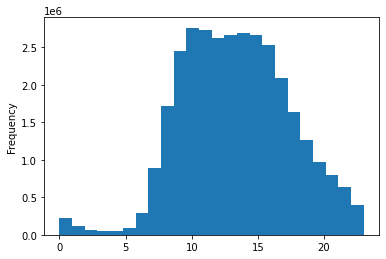

In [7]:
hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

The Histogram above indicates that the majority of orders occur in the middle of the day, and follow a roughly normal distribution from midnight to midnight.

## Question 4.
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

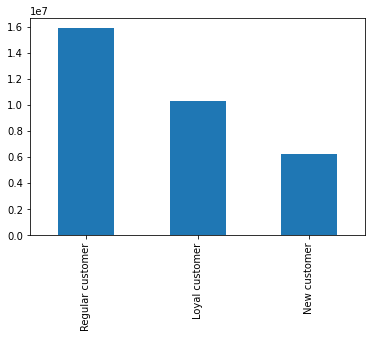

In [11]:
bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

## Question 5.
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
np.random.seed(31)

In [14]:
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [15]:
dev

array([ True, False, False, ...,  True, False,  True])

In [16]:
big = ords_prods_cust[dev]

In [17]:
small = ords_prods_cust[~dev]

In [18]:
df = small[['order_hour_of_day','prices']]

In [19]:
df2 = ords_prods_cust[['order_hour_of_day','prices']]

<AxesSubplot:xlabel='order_hour_of_day', ylabel='prices'>

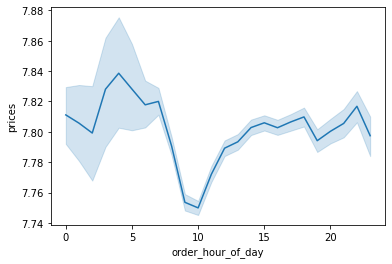

In [20]:
sns.lineplot(data = df2, x = 'order_hour_of_day',y = 'prices')

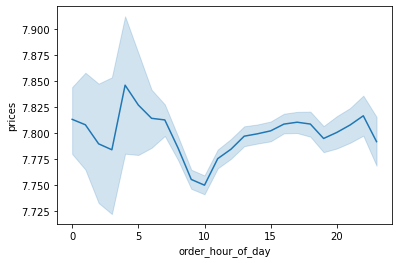

In [24]:
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

The line plots are similar between the full dataset, and my sample.  This means that the sample is representative of the data as a whole, and can be used for a faster analysis.

There is a different in price based on the hour of the day.  The average price increases the later into the night an order is placed.

## Question 6.
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

In [22]:
df_3 = small[['n_dependants','age']]

In [23]:
df_3

n_dependants  age
1                    3   31
2                    3   31
3                    3   31
6                    3   31
19                   3   31
...                ...  ...
32404839             0   25
32404845             0   25
32404847             0   25
32404853             0   25
32404857             3   22

[9723178 rows x 2 columns]

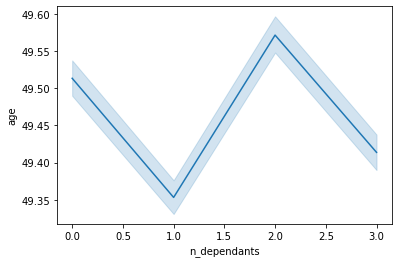

In [33]:
line_2 = sns.lineplot(data = df_3, x = 'n_dependants',y='age')

There is not a strong correlation between age and the number of dependants in the household.

## Question 7.
You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the `sns.scatterplot()` function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [34]:
df_4 = small[['age','income']]

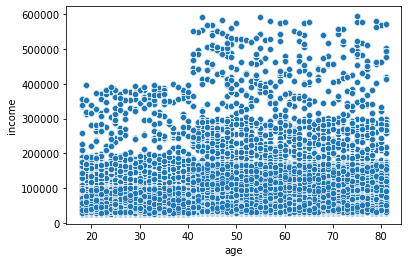

In [35]:
scatter = sns.scatterplot(data = df_4,x='age',y='income')

There is a notable jump in income around the 41 years of age mark.

## Question 8.
Export your visualizations as “.png” files in your relevant project folder.

In [36]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_hours.png'))

In [37]:
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'))

In [39]:
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_price_hour.png'))

In [40]:
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_dependant.png'))

In [41]:
scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_income_age.png'))